<div>
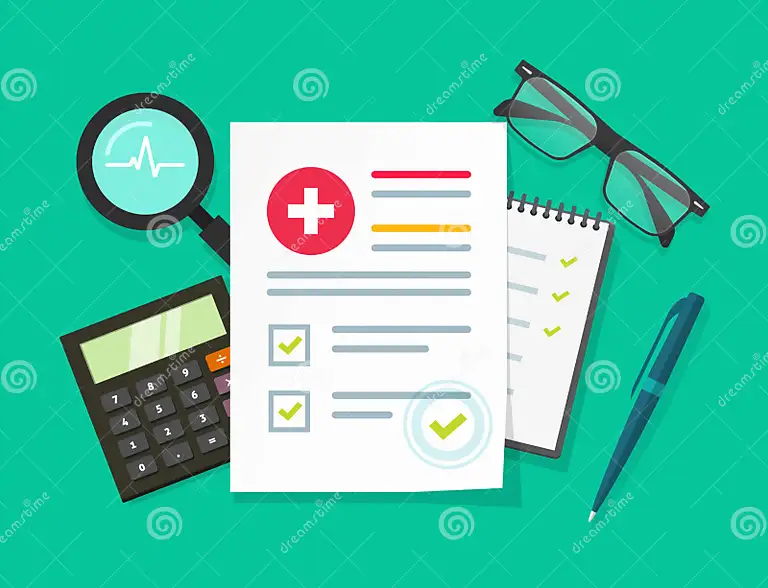
</div>

**DOMAIN** : Medical

**CONTEXT**: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

**DATA DESCRIPTION**: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part. 

**PROJECT OBJECTIVE**: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
%cd C:\Users\ajays\Dropbox\PGP-AIML\projects\medicalknn

C:\Users\ajays\Dropbox\PGP-AIML\projects\medicalknn


## Data Understanding

### A. Read the dataframes

In [2]:
df_normal = pd.read_csv('Normal.csv')
df_h = pd.read_csv('Type_H.csv')
df_s = pd.read_csv('Type_S.csv')

In [3]:
df_normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
df_h.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [5]:
df_s.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


### B. Structure and shape of the dataframes

In [6]:
df_normal.shape

(100, 7)

In [7]:
df_h.shape

(60, 7)

In [8]:
df_s.shape

(150, 7)

* *There is a difference in the number of observations in each of the data sets provided. There are:*
<ol>
    <li><em><b>100</b> observations for <b>Normal</b> class</em></li>
    <li><em><b>60</b> observations for <b>Type_H</b> class</em></li>
    <li><em><b>150</b> observations for <b>Type_S</b> class</em></li>
</ol>

In [9]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [10]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [11]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


* *There are **no missing values** in the columns in all the 3 data sets*

### C. Column analysis

In [12]:
df_normal.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [13]:
df_h.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [14]:
df_s.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

* *All 3 data sets have **same column names***

### D. Data types

In [15]:
df_normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [16]:
df_h.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [17]:
df_s.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

* *The **datatypes** for all columns in the 3 data sets **match for every column***

### E. 'Class' feature analysis

In [18]:
df_normal['Class'].value_counts()

Class
Normal    73
Nrmal     27
Name: count, dtype: int64

In [19]:
df_h['Class'].value_counts()

Class
Type_H    37
type_h    23
Name: count, dtype: int64

In [20]:
df_s['Class'].value_counts()

Class
Type_S    133
tp_s       17
Name: count, dtype: int64

* *As already proven above, since there are no missing values, **every data point in all 3 data sets have a class value***
* ***df_normal** seems to have all rows **belonging to the 'normal' class**, but however has variation in the way class is represented. It has possible values of **['Nornal','Nrmal']***
* ***df_h** seems to have all rows **belonging to the 'Type H' class**, but however has variation in the way class is represented. It has possible values of **['Type_H','type_h']***
* ***df_s** seems to have all rows **belonging to the 'Type S' class**, but however has variation in the way class is represented. It has possible values of **['Type_S','tp_s']***

## Data Preparation and Exploration

### A. 'Class' feature unification

We need to remove the variation in Class variable representation in the 3 data sets so we can define unique categories for every type. Let us consider the following types in the unified data sets:
* Class Normal as **Normal**
* Class Type H as **Type_H**
* Class Type S as **Type_S**

In [21]:
df_normal.loc[df_normal['Class'] != 'Normal', 'Class'] = 'Normal'

In [22]:
df_normal['Class'].value_counts()

Class
Normal    100
Name: count, dtype: int64

In [23]:
df_h.loc[df_normal['Class'] != 'Type_H', 'Class'] = 'Type_H'

In [24]:
df_h['Class'].value_counts()

Class
Type_H    60
Name: count, dtype: int64

In [25]:
df_s.loc[df_s['Class'] != 'Type_S', 'Class'] = 'Type_S'

In [26]:
df_s['Class'].value_counts()

Class
Type_S    150
Name: count, dtype: int64

### B. Dataframe unification

We can now safely merge the rows of all 3 dataframes as we have no missing values, all column labels are same and represent the same thing and we have unified the Class field representation above.

In [27]:
df = pd.concat([df_normal, df_h, df_s])

In [28]:
df.shape

(310, 7)

### C. Investigate unified dataframe

In [29]:
df.sample(n=5, random_state=1)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
78,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247,Normal
84,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,Type_S
25,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,Type_S
70,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,Normal
20,43.922840,14.177959,37.832547,29.744881,134.461016,6.451648,Type_H


### D. Null check and analysis

In [30]:
df.isnull().sum() / df.shape[0] * 100.00

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

* *There are **no missing values for any feature** in the unified dataframe*

### E. 5-point summary

In [31]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


* *S_Degree feature seems to have a few outliers as the max value is very igh compared to the mean or the median.*
* *There are one or more **negative values** for **P_tilt** and **S_Degree**. Based on the name of the columns they could refer to angles with respect to a certain axis and hence seem to be valid values.*

## Data Analysis

### A. Correlation heatmap

<Axes: >

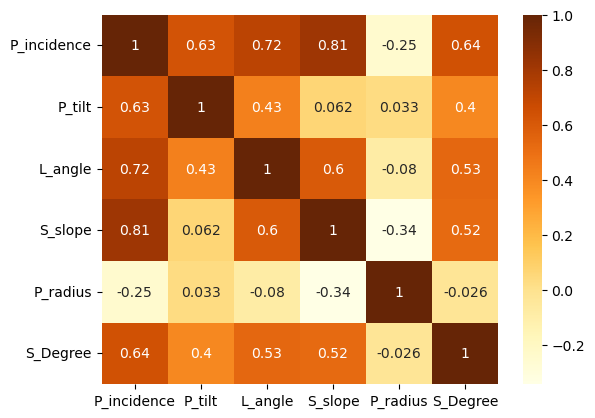

In [32]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='YlOrBr')

### B. Correlation insights

***Stronger positive correlation** is seen for the following features:*
* *P_incidence and S_slope with a value of 0.81*
* *P_incidence and L_angle with a value of 0.72*
* *P_incidence and S_Degree with a value of 0.64*
* *P_incidence and P_tilt with a value of 0.63*

***Weaker positive correlation** is seen for the following features:*
* *P_tilt and S_slope with a value of 0.062*
* *P_tilt and P_radius with a value of 0.033*

**Weaker negative correlation** is seen for the following features:*
* *P_radius and S_Degree with a value of -0.026*
* *P_radius and L_angle with a value of -0.08*
* *P_radius and P_incidence with a value of -0.25*
* *P_radius and S_slope with a value of -0.34*

### C. Pairplot

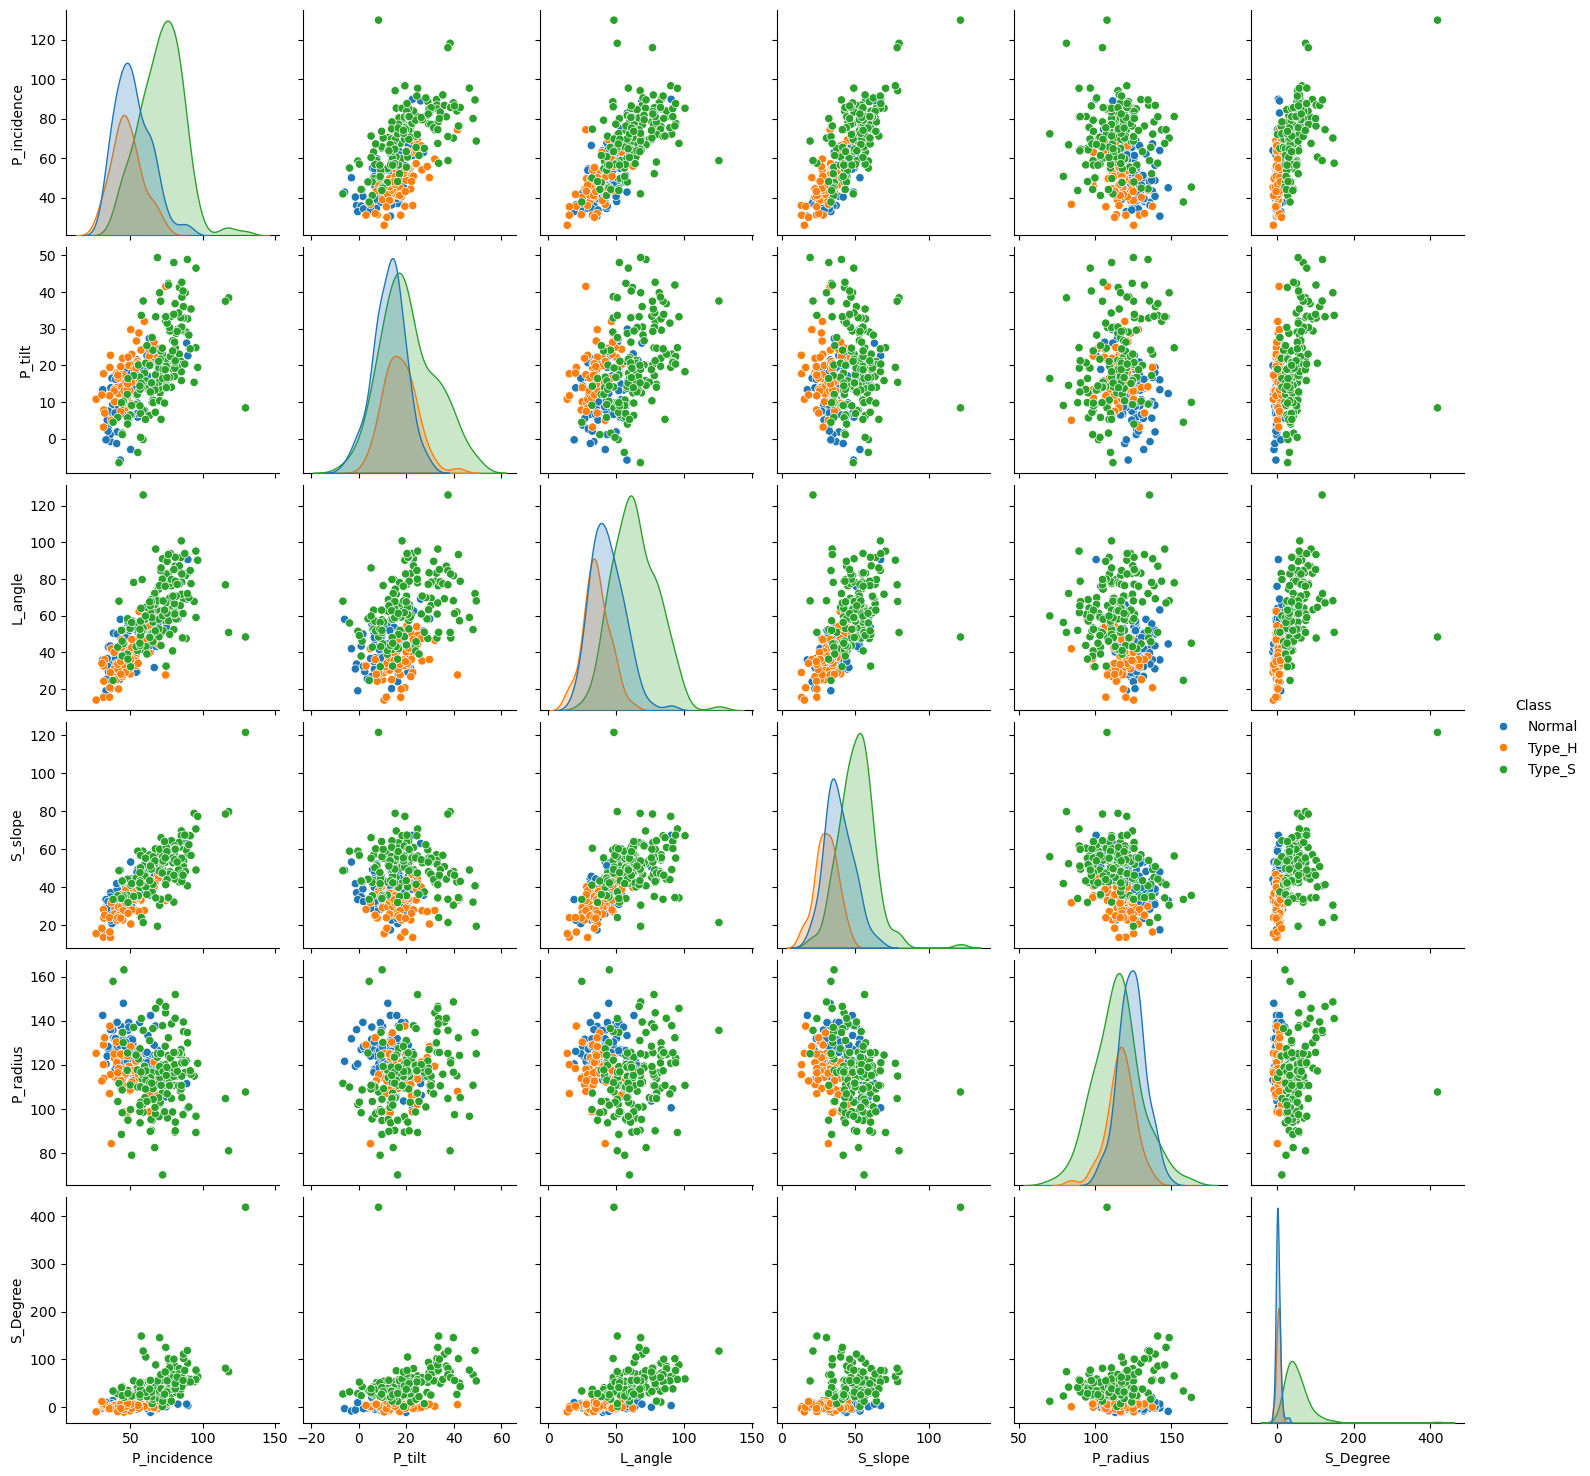

In [33]:
sns.pairplot(data=df, hue='Class', diag_kind='kde')

* *The pairplot **confirms the correlations** between the features as concluded from the heatmap*
* *All features show an **approximately normal distribution** when categorised by classes, even though they may **differ in their variances***.
* *The **variation** in the values for most features is **highest for the Type_S class***

### D. Jointplot

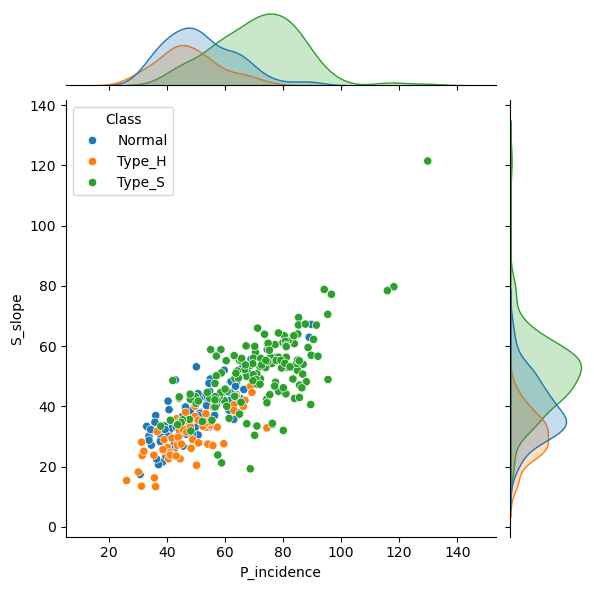

In [34]:
sns.jointplot(data=df, x='P_incidence', y='S_slope', hue='Class')

* *This shows a general **good positive correlation** between the features*
* *There is a **higher variation** in the values of this feature for **Type_S** as observed from the more **scattered green points with higher spread values***

### E. Boxplot

<Axes: >

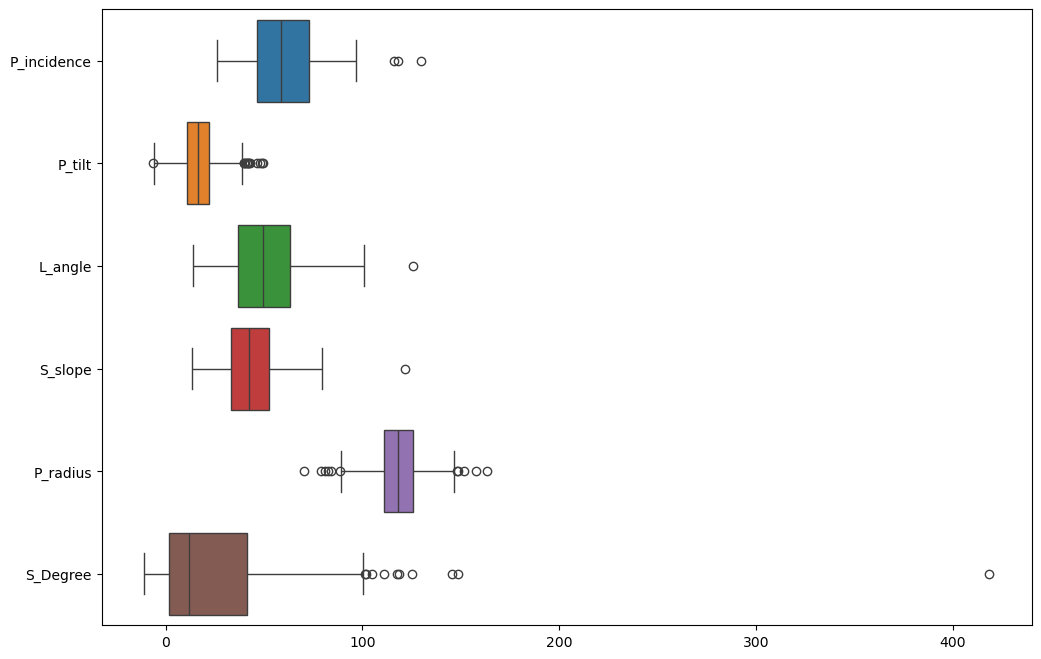

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')

* ***L_angle** and **S_slope** seems to have the **least number of outliers**. There is 1 **max outlier** each of the two features*
* ***S_Degree** has a **high max outlier** which seems out of the general range of the value of the feature** *The values for all the numerical fields seem to be fairly in the **range of 0-170***
* *There are **some negative values** for **P_tilt** and **S_Degree**. Based on the name of the columns they could refer to angles with respect to a certain axis and hence seem to be valid values.*

## Model Building

Before building model, we need to ensure that all the columns are represented in numeric values. Hence, the 'Class' feature needs to be label encoded into numerical categories

In [36]:
encoder = LabelEncoder()
df.loc[:,'Class'] = encoder.fit_transform(df.loc[:,'Class'])

In [37]:
df['Class'].value_counts()

Class
2    150
0    100
1     60
Name: count, dtype: int64

* *The 'Class' feature has been encoded as **0(Normal), 1(Type_H), 2(Type_S)***

### A. Data split into features and target

In [38]:
#Class is target variable
y = df['Class'].astype('int64')
#X are the input features
X = df.iloc[:, :-1]

In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 310, dtype: int64

In [40]:
X

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629


### B. Data split into training and testing set

In [41]:
#Split into train and test data with 80:20 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [42]:
X_train.shape

(248, 6)

In [43]:
y_train.shape

(248,)

In [44]:
X_test.shape

(62, 6)

In [45]:
y_test.shape

(62,)

* *The **total 310 data points** have been split into **248 train data points** and **62 test data points** respectively as indicated by the shape of the split data*

### C. KNN Classifier

In [46]:
#classifer with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)

#fit the model for the training data
knn3.fit(X_train, y_train)

#prediction on training data
y_pred_train = knn3.predict(X_train)

### D. Performance metrics

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        79
           1       0.86      0.83      0.84        46
           2       0.99      0.95      0.97       123

    accuracy                           0.92       248
   macro avg       0.90      0.90      0.90       248
weighted avg       0.92      0.92      0.92       248



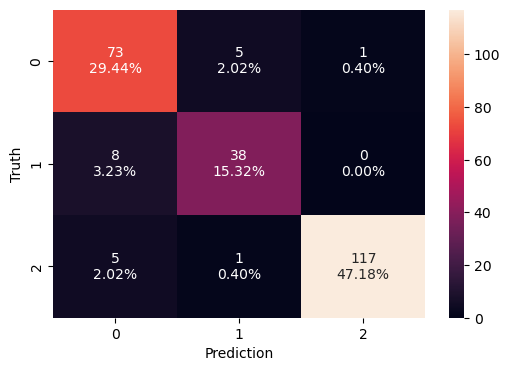

In [47]:
def confusion_matrix_map(model, target, predicted):
    cm = confusion_matrix(target, predicted)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Truth")
    plt.xlabel("Prediction")
    
def model_performance(model, target, predicted):
    print('Confusion Matrix:')
    print(confusion_matrix_map(model, target, predicted))
    print('Classification Report:')
    print(classification_report(target, predicted))




#model performance on training data 
model_performance(knn3, y_train, y_pred_train)

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        21
           1       0.75      0.43      0.55        14
           2       0.93      0.96      0.95        27

    accuracy                           0.79        62
   macro avg       0.78      0.73      0.74        62
weighted avg       0.80      0.79      0.78        62



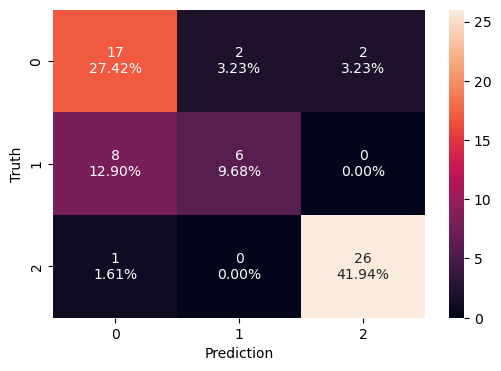

In [48]:
#prediction on test data
y_pred_test = knn3.predict(X_test)

##model performance on test data
model_performance(knn3, y_test, y_pred_test)

## Performance Improvement

### A. Parameter Experimentation

We need to find the most optimal value of k that improves the performance metrics for all 'Class' values

In [49]:
test_recall_0_score=[]
test_recall_1_score=[]
test_recall_2_score=[]
test_precision_0_score=[]
test_precision_1_score=[]
test_precision_2_score=[]
test_acc_score=[]
# odd number for neighbours from [1, 30)
neighbours = [k for k in np.arange(1, 50, 2)]
for n in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    test_acc_score.append(accuracy_score(y_test, y_pred_test)) 
    rsc = recall_score(y_test, y_pred_test, average=None)
    test_recall_0_score.append(rsc[0])
    test_recall_1_score.append(rsc[1])
    test_recall_2_score.append(rsc[2])
    psc = precision_score(y_test, y_pred_test, average=None)
    test_precision_0_score.append(psc[0])
    test_precision_1_score.append(psc[1])
    test_precision_2_score.append(psc[2])

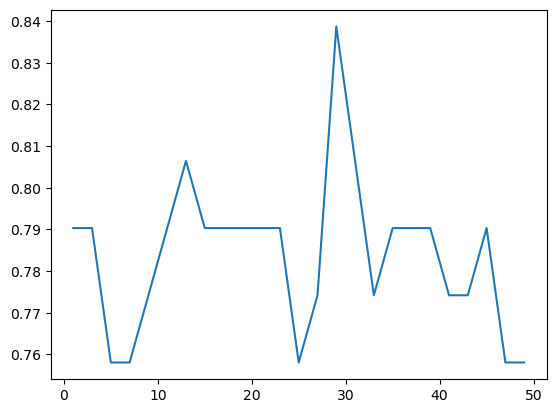

In [50]:
plt.plot(neighbours, test_acc_score)

* ***Highest accuracy of model seen around k in between 27-33***

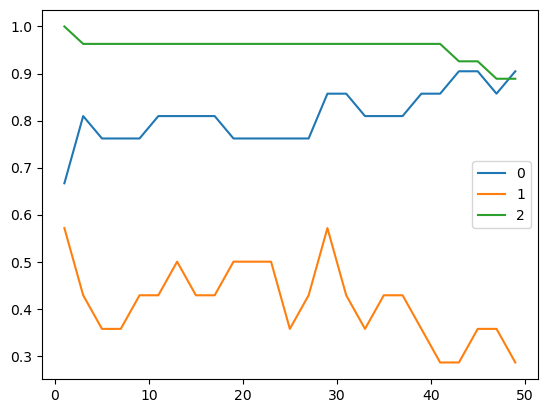

In [51]:
plt.plot(neighbours, test_recall_0_score)
plt.plot(neighbours, test_recall_1_score)
plt.plot(neighbours, test_recall_2_score)
plt.legend(['0', '1', '2'])
plt.show()

* ***Highest recall score peaks for all classes seen around k in between 27-33***

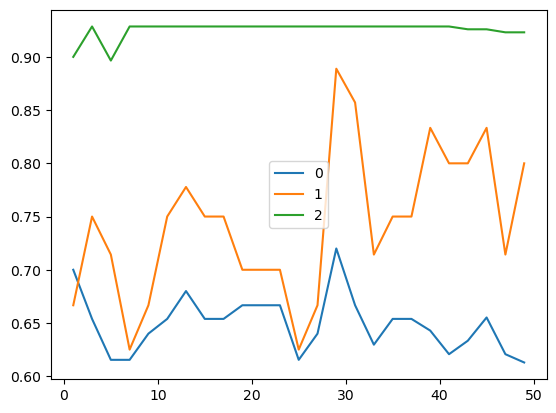

In [59]:
plt.plot(neighbours, test_precision_0_score)
plt.plot(neighbours, test_precision_1_score)
plt.plot(neighbours, test_precision_2_score)
plt.legend(['0', '1', '2'])
plt.show()

* ***Highest precision score peaks for all classes seen around k in between 27-33***

As we have nailed down fewer possible values for k, we can print classification report for each of the k values to arrive at the best value of k

In [60]:
#trying odd k values between 27 and 33
for n in np.arange(27, 33, 2):
    print("k = " + str(n))
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    print(classification_report(y_test, y_pred_test))

k = 27
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        21
           1       0.67      0.43      0.52        14
           2       0.93      0.96      0.95        27

    accuracy                           0.77        62
   macro avg       0.75      0.72      0.72        62
weighted avg       0.77      0.77      0.77        62

k = 29
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       0.89      0.57      0.70        14
           2       0.93      0.96      0.95        27

    accuracy                           0.84        62
   macro avg       0.85      0.80      0.81        62
weighted avg       0.85      0.84      0.83        62

k = 31
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        21
           1       0.86      0.43      0.57        14
           2       0.93      0.96      0.95        27


From the above k = 29 seems to be the best value for our model. Let us compare with k=29 model on train data predictions as well

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        79
           1       0.72      0.50      0.59        46
           2       0.97      0.95      0.96       123

    accuracy                           0.84       248
   macro avg       0.80      0.77      0.78       248
weighted avg       0.85      0.84      0.84       248



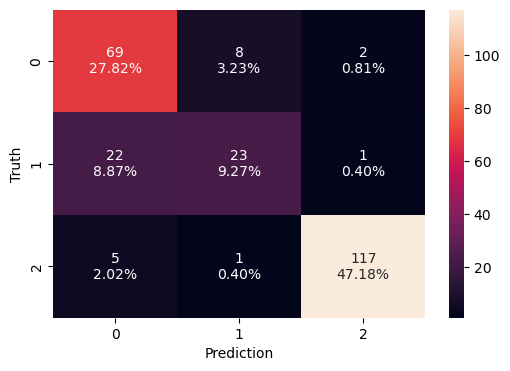

In [61]:
knn29 = KNeighborsClassifier(n_neighbors=29)

#run predictions on training data for validtion 
knn29.fit(X_train, y_train)
y_pred_train = knn29.predict(X_train)
print(classification_report(y_train, y_pred_train))
confusion_matrix_map(knn29, y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       0.89      0.57      0.70        14
           2       0.93      0.96      0.95        27

    accuracy                           0.84        62
   macro avg       0.85      0.80      0.81        62
weighted avg       0.85      0.84      0.83        62



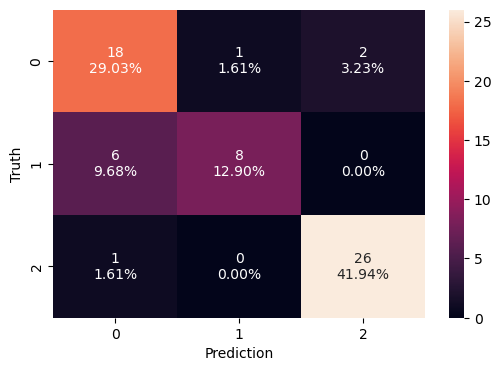

In [62]:
#run predictions on test data
y_pred_test = knn29.predict(X_test)
print(classification_report(y_test, y_pred_test))
confusion_matrix_map(knn29, y_test, y_pred_test)

*For **k=29***
* *The model has an **accuracy of 84% on the training data and 84% on the test data*** in general across classes
* *The model has **high values and extremely similar values of precision** for training and test data for **classes 0 and 2**. Class 1 has a lower precision value
* *The model has **high recall for Class 2 compared to Class 0 and 1**. However, all the recall scores have high significant values*
* *The model has **high f1 scores for classes 0 and 2**. It has has a significantly lower f1 score for Class 1 in training data than on the test data*

### B. Performance improvement

In [56]:
y_pred_test_3 = knn3.predict(X_test)
y_pred_test_29 = knn29.predict(X_test)
acc_score_improvement = (accuracy_score(y_pred_test_29, y_test)-accuracy_score(y_pred_test_3, y_test))/accuracy_score(y_pred_test_3, y_test) * 100
recall_score_0_improvement = (recall_score(y_pred_test_29, y_test, average=None)[0]-recall_score(y_pred_test_3, y_test, average=None)[0])/recall_score(y_pred_test_3, y_test, average=None)[0] * 100
recall_score_1_improvement = (recall_score(y_pred_test_29, y_test, average=None)[1]-recall_score(y_pred_test_3, y_test, average=None)[1])/recall_score(y_pred_test_3, y_test, average=None)[1] * 100
recall_score_2_improvement = (recall_score(y_pred_test_29, y_test, average=None)[2]-recall_score(y_pred_test_3, y_test, average=None)[2])/recall_score(y_pred_test_3, y_test, average=None)[2] * 100
recall_score_macro_improvement = (recall_score(y_pred_test_29, y_test, average='macro')-recall_score(y_pred_test_3, y_test, average='macro'))/recall_score(y_pred_test_3, y_test, average='macro') * 100
precision_score_0_improvement = (precision_score(y_pred_test_29, y_test, average=None)[0]-precision_score(y_pred_test_3, y_test, average=None)[0])/precision_score(y_pred_test_3, y_test, average=None)[0] * 100
precision_score_1_improvement = (precision_score(y_pred_test_29, y_test, average=None)[1]-precision_score(y_pred_test_3, y_test, average=None)[1])/precision_score(y_pred_test_3, y_test, average=None)[1] * 100
precision_score_2_improvement = (precision_score(y_pred_test_29, y_test, average=None)[2]-precision_score(y_pred_test_3, y_test, average=None)[2])/precision_score(y_pred_test_3, y_test, average=None)[2] * 100
precision_score_macro_improvement = (precision_score(y_pred_test_29, y_test, average='macro')-precision_score(y_pred_test_3, y_test, average='macro'))/precision_score(y_pred_test_3, y_test, average='macro') * 100
print('Accuracy: ' + str(round(acc_score_improvement, 2)) + '% improvement\n')
print('Recall Score Macro: ' + str(round(recall_score_macro_improvement, 2)) + '% improvement')
print('Recall Score for Class 0: ' + str(round(recall_score_0_improvement, 2)) + '% improvement')
print('Recall Score for Class 1: ' + str(round(recall_score_1_improvement, 2)) + '% improvement')
print('Recall Score for Class 2: ' + str(round(recall_score_2_improvement, 2)) + '% improvement\n')
print('Precision Score Macro: ' + str(round(precision_score_macro_improvement, 2)) + '% improvement')
print('Precision Score for Class 0: ' + str(round(precision_score_0_improvement, 2)) + '% improvement')
print('Precision Score for Class 1: ' + str(round(precision_score_1_improvement, 2)) + '% improvement')
print('Precision Score for Class 2: ' + str(round(precision_score_2_improvement, 2)) + '% improvement')


Accuracy: 6.12% improvement

Recall Score Macro: 8.79% improvement
Recall Score for Class 0: 10.12% improvement
Recall Score for Class 1: 18.52% improvement
Recall Score for Class 2: 0.0% improvement

Precision Score Macro: 8.65% improvement
Precision Score for Class 0: 5.88% improvement
Precision Score for Class 1: 33.33% improvement
Precision Score for Class 2: 0.0% improvement


* *The model for k=29 has shown a **6.12% improvement in accuracy** over k=3*
* *The model for k=29 has shown a **8.79% improvement in macro recall score** over k=3*
* *The model for k=29 has shown a **8.65% improvement in macro percision score** over k=3*
* *The model for k=29 has shown **positive % improvements in the recall and precision scores for Class 0 and 1***
* *The model for k=29 has shown **negligible improvements in the recall and precision scores for Class 2***

### C. Parameter contribution to performance improvement

* *In the above experiment the value of **'k'** is the parameter that has helped most in improving the model performance. In this case default values of **metric='Minkowski' and p=2** have been used while initialising the KNeighboursClassifier. Hence, the distance measure defaults to **Euclidean distance.***